# Advanced Course in Machine Learning
## Exercise Session 1


<span style="color:blue">**Sanaz Jamalzadeh**</span>

## 3. Eigen-value decomposition (programming exercise)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Exercise 3.a

In [8]:
data_X = pd.read_csv("ex_1_data.csv", header=None)
data_X

,0,1,2,3,4
0,-0.235,-0.671,-1.056,-0.960,-0.429
1,-0.080,0.202,0.554,0.124,-0.280
2,-0.134,-0.217,-0.164,0.160,0.338
3,0.156,0.048,0.291,0.237,0.245
4,-0.022,0.092,0.075,-0.083,-0.198
...,...,...,...,...,...
195,-0.513,-0.216,-0.477,-0.077,0.012
196,1.779,1.243,2.056,1.055,0.428
197,0.141,-0.133,-0.318,0.118,0.044
198,-0.173,-0.484,-0.561,-0.439,-0.047


#### For data set X --> N = 200 and D =5

#### Exercise 3.b

In [9]:
# Covariance Matrix
cov_mat_X = data_X.cov()
print('\nThe covariance matrix equals: \n')
print(cov_mat_X)

# Compute eigenvalues and eigenvectorors
eigVal, eigVec = np.linalg.eig(cov_mat_X)
eigVals_ = pd.DataFrame(eigVal, columns=['eigVals'])
eigVecs_ = pd.DataFrame(eigVec)


# Print eigenvalues in descending order
eigVals_ = eigVals_.sort_values('eigVals', ascending=False)
print('\n eigenvalues in descendig order are: \n')
print(eigVals_)


The covariance matrix equals: 

          0         1         2         3         4
0  0.408549  0.236535  0.502366  0.304702  0.174483
1  0.236535  0.252841  0.465531  0.306768  0.108594
2  0.502366  0.465531  0.926864  0.635711  0.272427
3  0.304702  0.306768  0.635711  0.571994  0.301852
4  0.174483  0.108594  0.272427  0.301852  0.237854

 eigenvalues in descendig order are: 

    eigVals
0  2.012650
1  0.222862
2  0.142902
3  0.010429
4  0.009259


#### Exercise 3.c

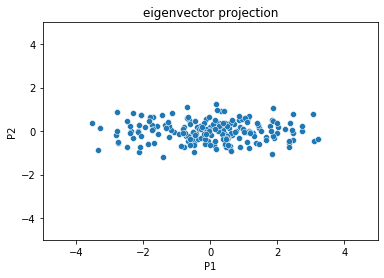

In [10]:
eigVecs_ = eigVecs_.transpose()
eigVecs_ = eigVecs_.reindex(eigVals_.index)
eigVecs_ = eigVecs_.reset_index(drop=True)

# Project the two maximum eigenVals eigenVecs
project = list()
for i in range(len(eigVecs_.iloc[0])):
 project.append(pd.DataFrame(np.dot(eigVecs_.iloc[0:(i+1),:],data_X.transpose())))

for i in range(len(project)):
  project[i] = project[i].transpose()


# Plot two max projections
sns.scatterplot(x = project[4].iloc[:,0], y = project[4].iloc[:,1]).plot()
plt.title('eigenvector projection')
plt.xlabel('P1')
plt.ylabel('P2')

# Its better to have equall scaling for the axes
plt.xlim(-5,5); 
plt.ylim(-5,5)
plt.show()

#### Exercise 3.d

[76.70497237116592, 32.355438425310766, 3.9179041657145457, 1.8425906022674972, 6.556759099102598e-27]


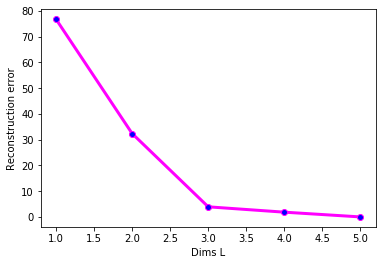

In [11]:
#reconstruction error as a function of reduced dimentionality

for i in range(len(project)):
 project[i] = pd.DataFrame(project[i], columns=None)

#D = 5 in this data set

#reconstructing the error from L=1 to L=5
reconst_error = list()
for i in range(len(eigVec)):
 reconst_error.append(np.dot(eigVecs_.iloc[0:(i+1),:].transpose(), project[i].transpose()).transpose())


# Then we can calculate error in the matrix
data_O = data_X.copy()
loss = list()
for r in reconst_error:
 loss_Mat = data_O.sub(r)
 loss_Mat = loss_Mat**2
 loss.append(loss_Mat.values.sum())

# Plot the error as a function of reduced dimensionality L
plt.plot( range(1,6), loss, marker='o', markerfacecolor='blue', markersize=6, color='magenta', linewidth=3)
print(loss)
plt.xlabel('Dims L')
plt.ylabel('Reconstruction error')
plt.show()


#### About relation to the eigenvalues computed in step (b), I assume if we devide the reconstruction error by N, the results would be close to summing up the eigenvalues corresponding to the Lth eigenvectors that we are not including (in each step). Here is a simple calculation to demonstrate it better:

In [12]:
#N=200 compute average of loss
N = 200
loss_ave = [x / N for x in loss]
print(loss_ave)

[0.3835248618558296, 0.16177719212655384, 0.019589520828572727, 0.009212953011337486, 3.2783795495512993e-29]


In [13]:
#sum up the eigenvalues corresponding to the dimensions that were dropped somehow. 
list_eigVal = [2.012650, 0.222862, 0.142902, 0.010429, 0.009259]
array_sum = sum(list_eigVal)

print('sum of array without L1', 'the sum is', array_sum - list_eigVal[0])
print('sum of array without L2','the sum is', array_sum - (list_eigVal[0]+ list_eigVal[1]))
print('sum of array without L3','the sum is', array_sum - (list_eigVal[0]+ list_eigVal[1] + list_eigVal[2]))
print('sum of array without L4','the sum is', array_sum - (list_eigVal[0]+ list_eigVal[1] + list_eigVal[2] + list_eigVal[3]))
print('sum of array without L5','the sum is', array_sum - (list_eigVal[0]+ list_eigVal[1] + list_eigVal[2] + list_eigVal[3] +list_eigVal[4]))

sum of array without L1 the sum is 0.3854519999999999
sum of array without L2 the sum is 0.1625899999999998
sum of array without L3 the sum is 0.019687999999999928
sum of array without L4 the sum is 0.009259000000000128
sum of array without L5 the sum is 0.0
